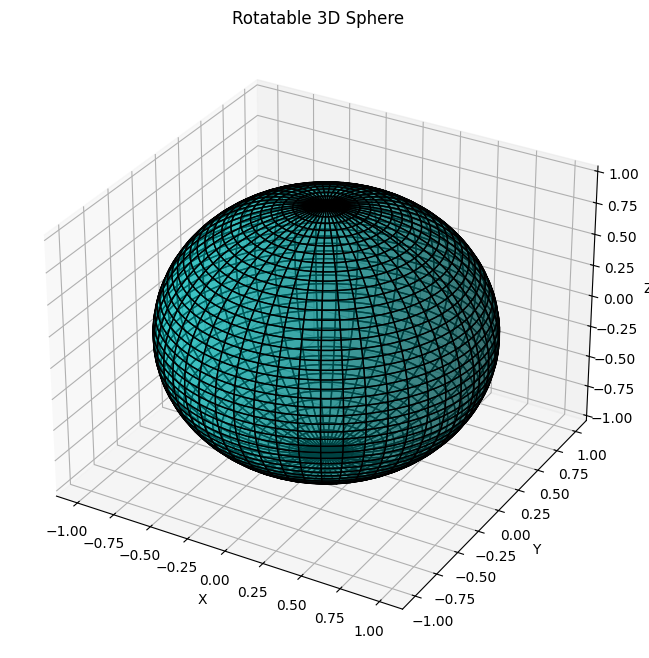

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

# Generate spherical coordinates
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the sphere surface
ax.plot_surface(x, y, z, color='c', edgecolor='k', alpha=0.5)

# Set axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rotatable 3D Sphere')

plt.show()


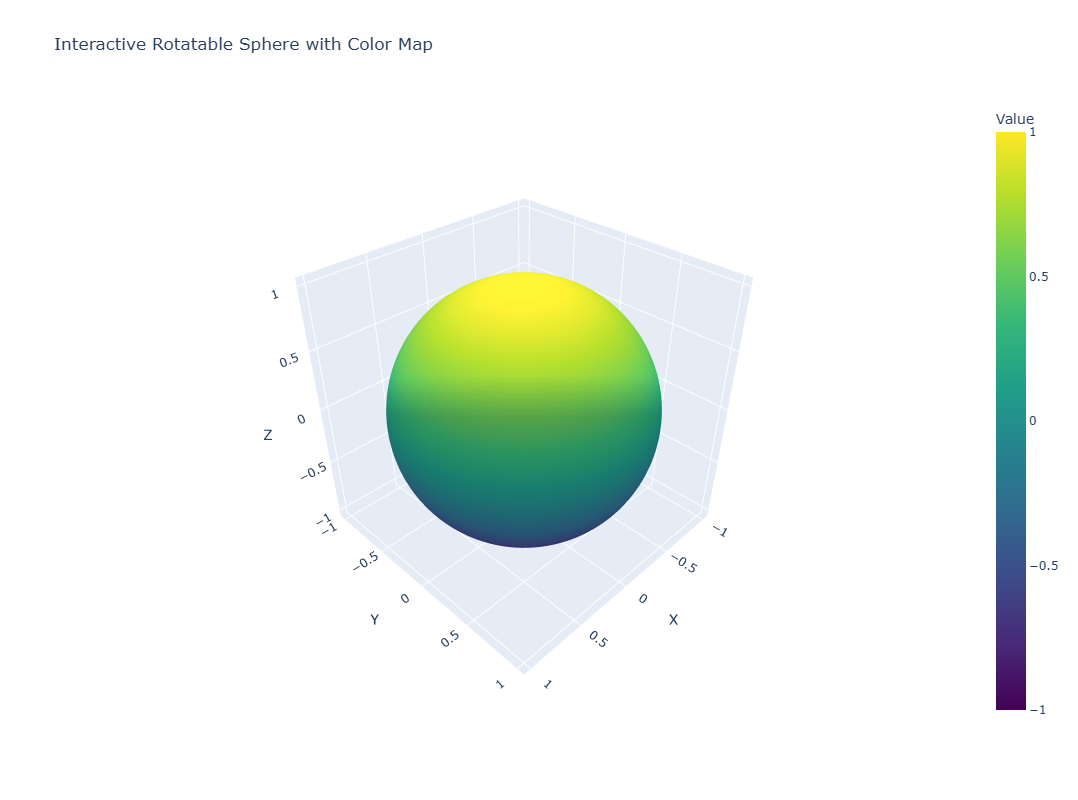

'\n# Wave pattern based on spherical coordinates\ncolors_wave = np.sin(5*u)[:, np.newaxis] * np.cos(5*v)[np.newaxis, :]\n\nfig2 = go.Figure(data=[go.Surface(\n    x=x, y=y, z=z,\n    surfacecolor=colors_wave,\n    colorscale=\'Rainbow\',\n    colorbar=dict(title="Wave Pattern"),\n    showscale=True\n)])\n\nfig2.update_layout(\n    title=\'Sphere with Wave Pattern\',\n    scene=dict(\n        xaxis_title=\'X\',\n        yaxis_title=\'Y\',\n        zaxis_title=\'Z\',\n        aspectmode=\'data\'\n    ),\n    width=800,\n    height=800\n)\n\nfig2.show()\n'

In [10]:
import numpy as np
import plotly.graph_objects as go

# Create sphere coordinates
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Create a color map based on height (z-coordinate) or you can use other functions
# Option 1: Color based on z-coordinate (height)
colors = z

# Option 2: Color based on distance from a point
# colors = np.sqrt(x**2 + y**2 + z**2)

# Option 3: Color based on a custom function (e.g., combination of coordinates)
# colors = np.sin(5*x) * np.cos(5*y)

# Create the 3D surface plot
fig = go.Figure(data=[go.Surface(
    x=x, y=y, z=z,
    surfacecolor=colors,
    colorscale='Viridis',  # You can change to 'Plasma', 'Jet', 'Rainbow', etc.
    colorbar=dict(title="Value"),
    showscale=True
)])

# Update layout for better visualization
fig.update_layout(
    title='Interactive Rotatable Sphere with Color Map',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data',  # Equal aspect ratio
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    width=800,
    height=800
)

# Display the figure
fig.show()

# Alternative: More complex color pattern
# Uncomment below for a wave pattern on the sphere
"""
# Wave pattern based on spherical coordinates
colors_wave = np.sin(5*u)[:, np.newaxis] * np.cos(5*v)[np.newaxis, :]

fig2 = go.Figure(data=[go.Surface(
    x=x, y=y, z=z,
    surfacecolor=colors_wave,
    colorscale='Rainbow',
    colorbar=dict(title="Wave Pattern"),
    showscale=True
)])

fig2.update_layout(
    title='Sphere with Wave Pattern',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data'
    ),
    width=800,
    height=800
)

fig2.show()
"""

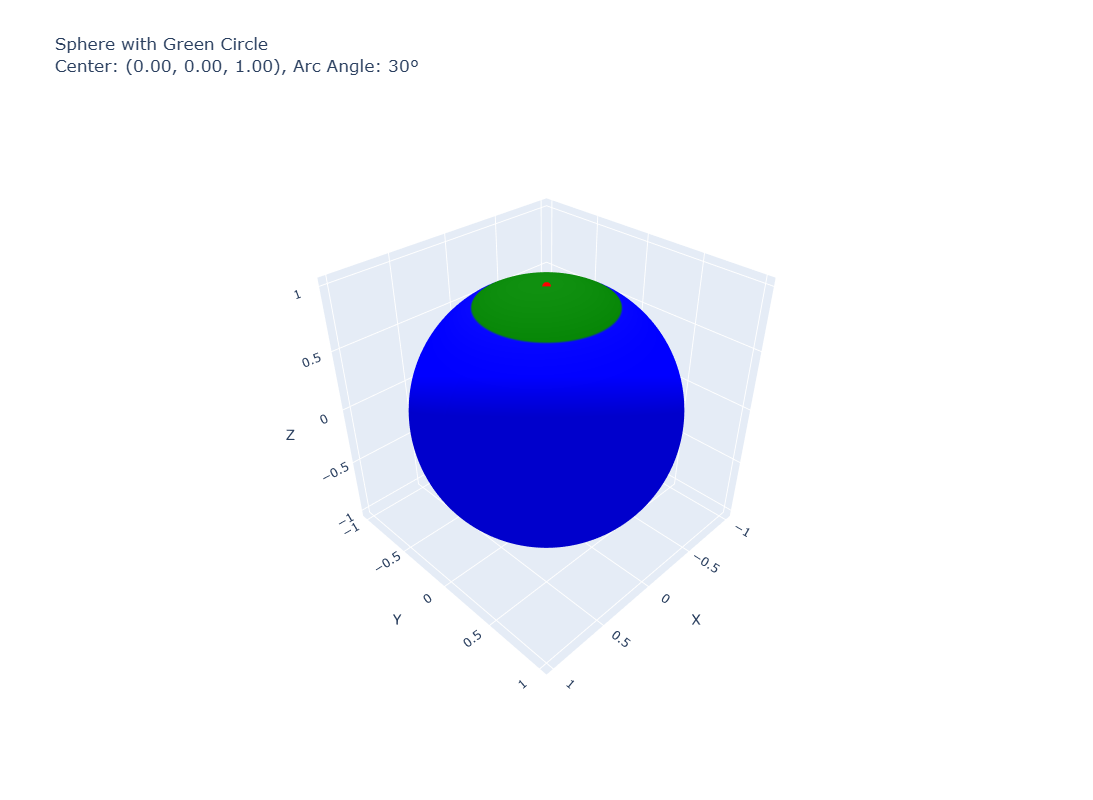

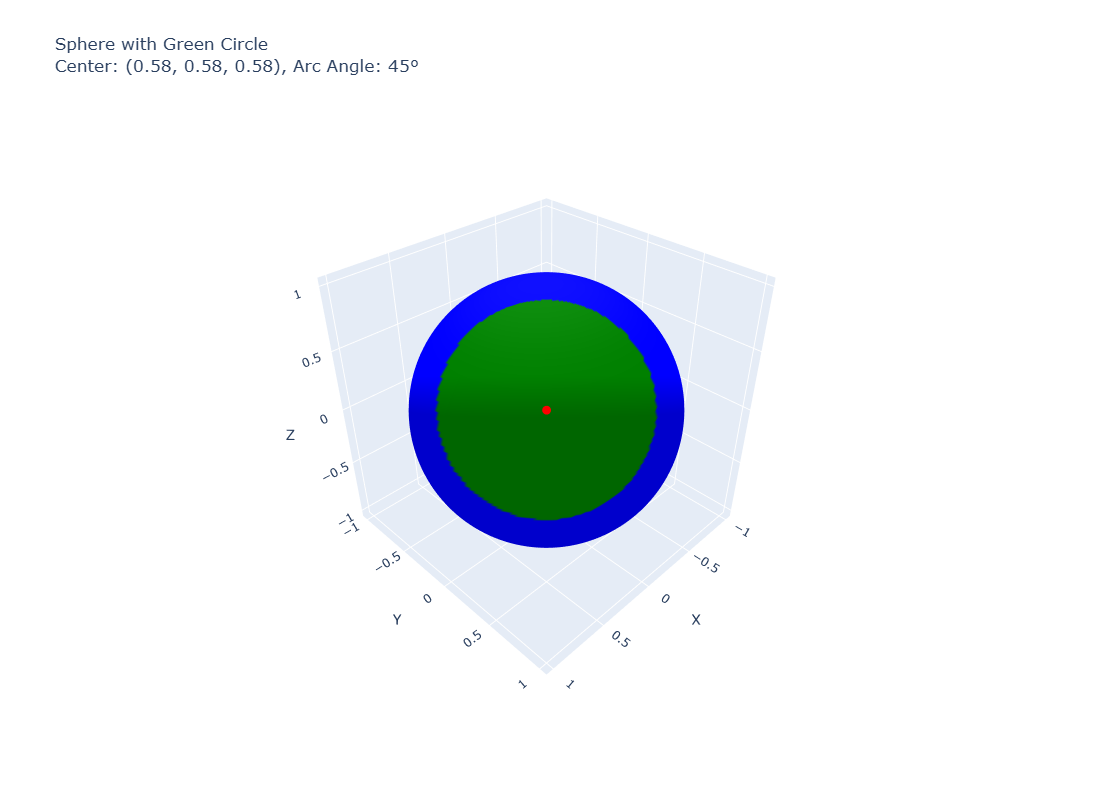

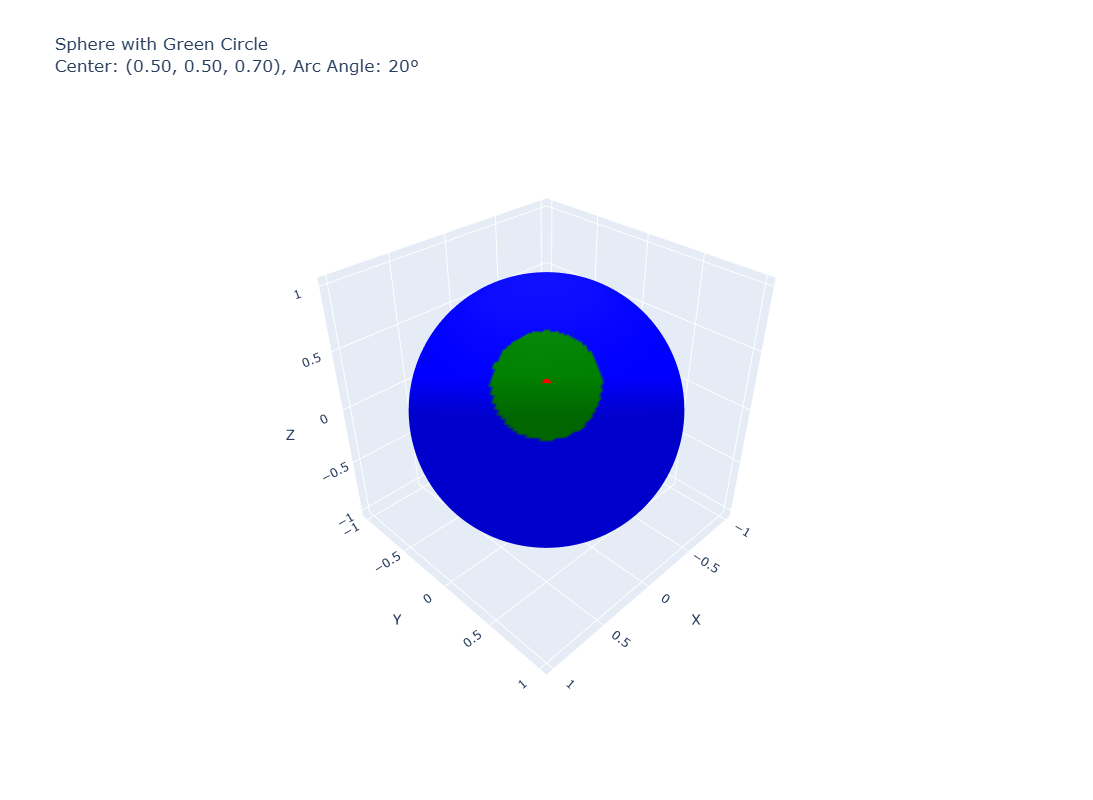

In [11]:
import numpy as np
import plotly.graph_objects as go

def create_sphere_with_circle(center_vector, arc_angle_degrees):
    """
    Create a blue sphere with a green circular region.
    
    Parameters:
    - center_vector: tuple (x, y, z) - unit vector pointing to circle center
    - arc_angle_degrees: float - angular radius of the green circle in degrees
    """
    # Normalize the center vector to ensure it's a unit vector
    center = np.array(center_vector)
    center = center / np.linalg.norm(center)
    
    # Create sphere coordinates
    u = np.linspace(0, 2 * np.pi, 200)
    v = np.linspace(0, np.pi, 200)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Initialize colors - all blue
    colors = np.zeros_like(x)
    
    # Convert arc angle to radians
    arc_angle_rad = np.radians(arc_angle_degrees)
    
    # Calculate angular distance from center point for each point on sphere
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            # Current point on sphere
            point = np.array([x[i, j], y[i, j], z[i, j]])
            
            # Calculate angular distance using dot product
            # cos(angle) = dot(v1, v2) for unit vectors
            cos_angle = np.dot(point, center)
            # Clamp to [-1, 1] to avoid numerical errors
            cos_angle = np.clip(cos_angle, -1, 1)
            angle = np.arccos(cos_angle)
            
            # If within the circle radius, color it green (1), else blue (0)
            if angle <= arc_angle_rad:
                colors[i, j] = 1
    
    # Create custom colorscale: 0 = blue, 1 = green
    colorscale = [[0, 'blue'], [1, 'green']]
    
    # Create the 3D surface plot
    fig = go.Figure(data=[go.Surface(
        x=x, y=y, z=z,
        surfacecolor=colors,
        colorscale=colorscale,
        showscale=False,
        cmin=0,
        cmax=1
    )])
    
    # Add a marker at the center point for reference
    fig.add_trace(go.Scatter3d(
        x=[center[0]],
        y=[center[1]],
        z=[center[2]],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='Circle Center'
    ))
    
    # Update layout
    fig.update_layout(
        title=f'Sphere with Green Circle<br>Center: ({center[0]:.2f}, {center[1]:.2f}, {center[2]:.2f}), Arc Angle: {arc_angle_degrees}°',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data',
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.5)
            )
        ),
        width=800,
        height=800
    )
    
    return fig

# Example usage:
# Center at north pole with 30 degree radius
fig1 = create_sphere_with_circle(center_vector=(0, 0, 1), arc_angle_degrees=30)
fig1.show()

# Example 2: Circle at an angle with 45 degree radius
fig2 = create_sphere_with_circle(center_vector=(1, 1, 1), arc_angle_degrees=45)
fig2.show()

# Example 3: Small circle at different location
fig3 = create_sphere_with_circle(center_vector=(0.5, 0.5, 0.7), arc_angle_degrees=20)
fig3.show()

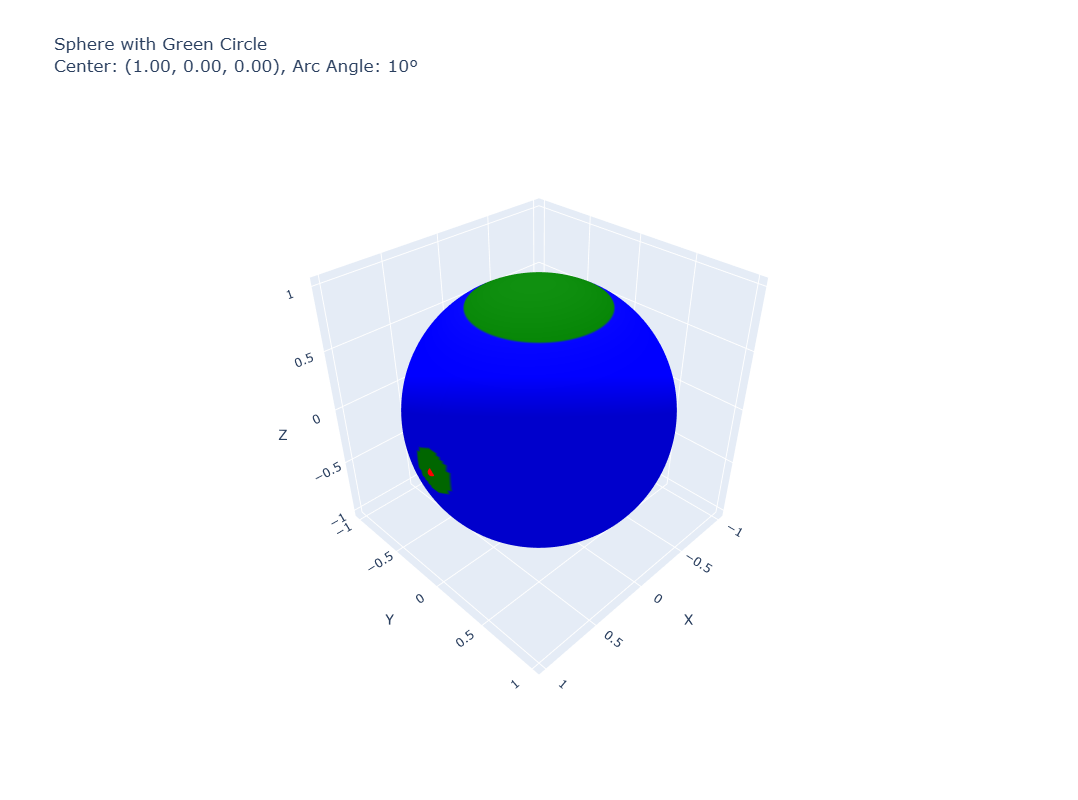

In [12]:
import numpy as np
import plotly.graph_objects as go

def create_sphere_with_circle(points):
    """
    Create a blue sphere with a green circular region.
    
    Parameters:
    - center_vector: tuple (x, y, z) - unit vector pointing to circle center
    - arc_angle_degrees: float - angular radius of the green circle in degrees
    """
    
    # Create sphere coordinates
    u = np.linspace(0, 2 * np.pi, 200)
    v = np.linspace(0, np.pi, 200)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Initialize colors - all blue
    colors = np.zeros_like(x)
    
    for center_vector, arc_angle_degrees in points:
        # Normalize the center vector to ensure it's a unit vector
        center = np.array(center_vector)
        center = center / np.linalg.norm(center)
    
        # Convert arc angle to radians
        arc_angle_rad = np.radians(arc_angle_degrees)
        
        # Calculate angular distance from center point for each point on sphere
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                # Current point on sphere
                point = np.array([x[i, j], y[i, j], z[i, j]])
                
                # Calculate angular distance using dot product
                # cos(angle) = dot(v1, v2) for unit vectors
                cos_angle = np.dot(point, center)
                # Clamp to [-1, 1] to avoid numerical errors
                cos_angle = np.clip(cos_angle, -1, 1)
                angle = np.arccos(cos_angle)
                
                # If within the circle radius, color it green (1), else blue (0)
                if angle <= arc_angle_rad:
                    colors[i, j] = 1
        
    # Create custom colorscale: 0 = blue, 1 = green
    colorscale = [[0, 'blue'], [1, 'green']]
    
    # Create the 3D surface plot
    fig = go.Figure(data=[go.Surface(
        x=x, y=y, z=z,
        surfacecolor=colors,
        colorscale=colorscale,
        showscale=False,
        cmin=0,
        cmax=1
    )])
    
    # Add a marker at the center point for reference
    fig.add_trace(go.Scatter3d(
        x=[center[0]],
        y=[center[1]],
        z=[center[2]],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='Circle Center'
    ))
    
    # Update layout
    fig.update_layout(
        title=f'Sphere with Green Circle<br>Center: ({center[0]:.2f}, {center[1]:.2f}, {center[2]:.2f}), Arc Angle: {arc_angle_degrees}°',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data',
            camera=dict(
                eye=dict(x=1.5, y=1.5, z=1.5)
            )
        ),
        width=800,
        height=800
    )
    
    return fig

# Example usage:
# Center at north pole with 30 degree radius
fig1 = create_sphere_with_circle([((0, 0, 1), 30), ( (1,0,0), 10)])
fig1.show()
